# **Answer** **1a**

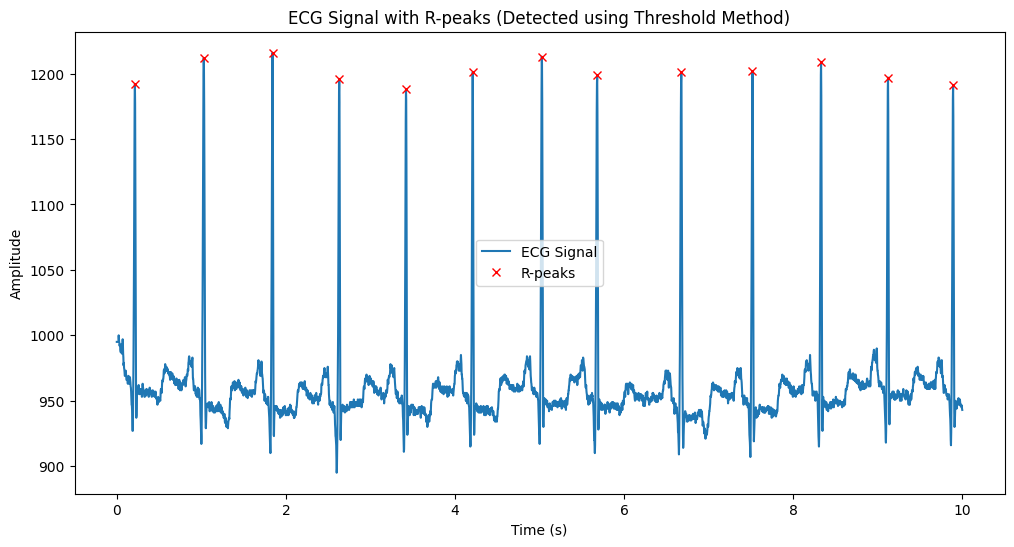

R-peaks indices: [  77  370  663  947 1231 1515 1809 2045 2403 2706 2998 3283 3560]


In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Load the MATLAB file
mat_data = scipy.io.loadmat("C:\\Users\\sahua\\Downloads\\BioMed\\Assignment1\\givenECG3.mat")

# Extract ECG signal and sampling frequency
ecg_signal = mat_data['givenECG3']
sampling_frequency = 360
ecg_signal = ecg_signal.flatten()

# Implement threshold-based peak detection algorithm
threshold = 1150
r_peak1 = []
for i in range(ecg_signal.size):
    if ecg_signal[i] > threshold:
        r_peak1.append([ecg_signal[i], i])
r_peak1 = np.array(r_peak1)

r_peak = []
n = len(r_peak1)
for j in range(1, n - 1):
    if r_peak1[j][0] > r_peak1[j - 1][0] and r_peak1[j][0] > r_peak1[j + 1][0]:
        r_peak.append([r_peak1[j][0], r_peak1[j][1]])

# Plot ECG signal with detected R-peaks
plt.figure(figsize=(12, 6))
time_axis = np.arange(len(ecg_signal.flatten())) / sampling_frequency
plt.plot(time_axis, ecg_signal.flatten(), label='ECG Signal')
plt.plot(np.array(r_peak)[:, 1] / sampling_frequency, np.array(r_peak)[:, 0], 'rx', label='R-peaks')
plt.title('ECG Signal with R-peaks (Detected using Threshold Method)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Display R-peaks indices
print("R-peaks indices:", np.array(r_peak)[:, 1])


# **Answer** **1b**

In [2]:
# Calculate RR-intervals
rr_intervals = np.diff(np.array(r_peak)[:, 1]) / sampling_frequency

# Print RR-intervals
print("RR-intervals:", rr_intervals)

RR-intervals: [0.81388889 0.81388889 0.78888889 0.78888889 0.78888889 0.81666667
 0.65555556 0.99444444 0.84166667 0.81111111 0.79166667 0.76944444]


# **Answer** **1c**

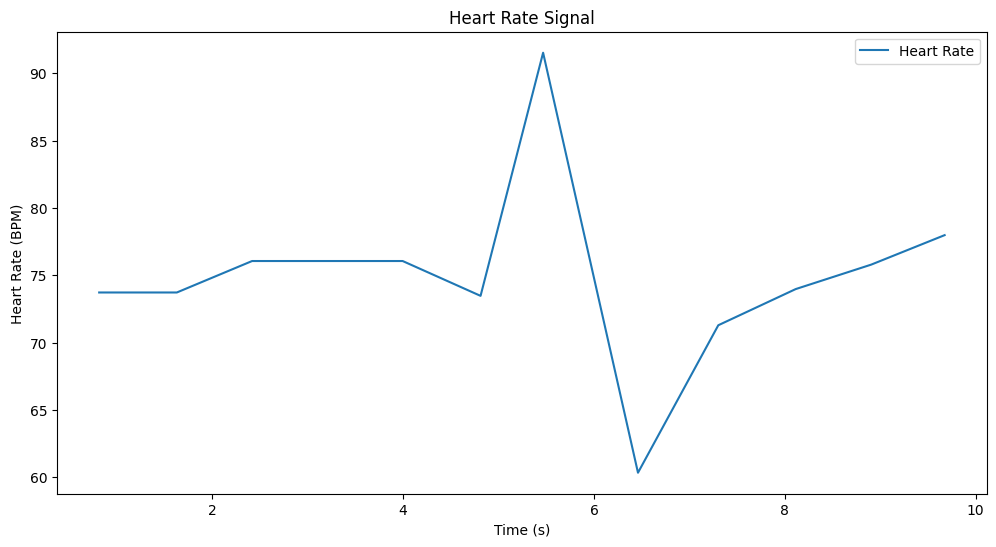

In [3]:
# Derive heart rate (BPM)
heart_rate = 60 / rr_intervals

# Plot the heart rate signal against time
time_axis = np.cumsum(rr_intervals)  # Cumulative sum of RR-intervals to get time
plt.figure(figsize=(12, 6))
plt.plot(time_axis, heart_rate, label='Heart Rate')
plt.title('Heart Rate Signal')
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (BPM)')
plt.legend()
plt.show()

# **Answer** **1d**

In [4]:
mean_heart_rate = np.mean(heart_rate)
std_heart_rate = np.std(heart_rate)

# Print mean and standard deviation
print("Mean Heart Rate:", mean_heart_rate, "BPM")
print("Standard Deviation of Heart Rate:", std_heart_rate, "BPM")

Mean Heart Rate: 74.99723655197333 BPM
Standard Deviation of Heart Rate: 6.591959655531684 BPM


In [5]:
from scipy import signal
import pywt
import math
from scipy.signal import butter, filtfilt
from scipy import signal
from scipy.signal import butter, iirnotch, lfilter

# **Answer 2**

In [6]:
# input ECG data
inputECG = scipy.io.loadmat("C:\\Users\\sahua\\Downloads\\BioMed\\Assignment1\\inputECG.mat")
# given ECG data as a 1D array
inputECG = np.array(np.reshape(inputECG['inputECG'], (-1, )))
# number of samples
N_S = np.shape(inputECG)[0]
# given sampling frequency (in Hz)
f_S = 360
# sampling period
t_S = (1 / f_S)
# highest frequency component in input signal
f_H = (f_S / 2)
print("Sampling period:", t_S)
print("Number of samples:", N_S)

Sampling period: 0.002777777777777778
Number of samples: 3600


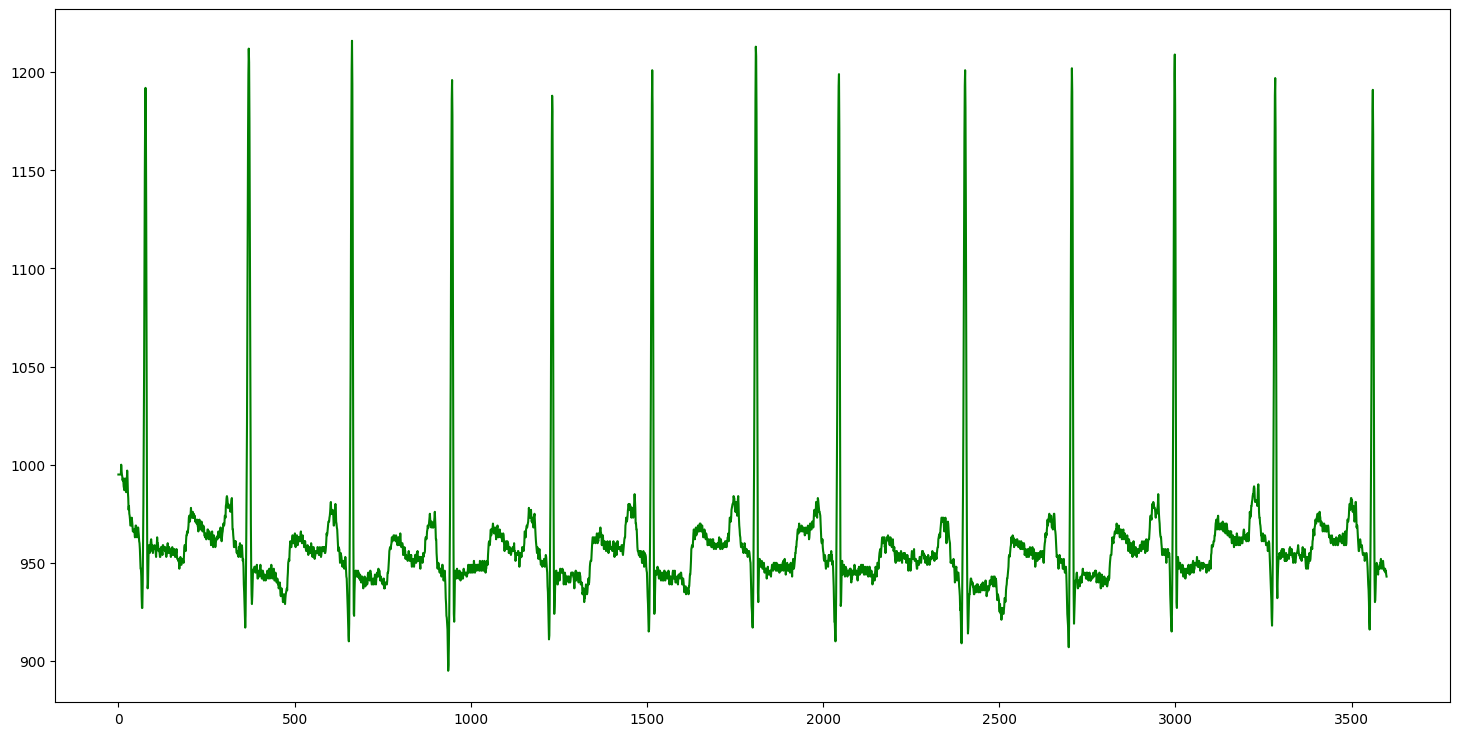

In [7]:
# Let us plot the input data with respect to index
t = np.arange(N_S)
fig = plt.figure(figsize = (18, 9))
plt.plot(t, inputECG,color='g')

In [8]:
def PPRD(I, O):
    return (np.sqrt(np.sum((I - O) ** 2) / np.sum(I ** 2)) * 100)

In [9]:
def TimeSynchronizedAveraging(inputECG, N):
    # create N copies of the input ECG signal
    I = np.array([inputECG for i in range(N)])
    # create N random noise signals of same number of samples as input ECG signal with 0 mean
    noise = np.array([np.random.normal(loc = 0.0, scale = 1.0, size = N_S) for i in range(N)])
    # add noise to N copies of the input ECG signal
    I_noise = (I + noise)
    # perform averaging
    O = np.mean(I_noise, axis = 0)
    # calculate PRD
    PRD = PPRD(inputECG, O)
    # return PRD

    return PRD

22
(22,)


Text(0, 0.5, '%PRD')

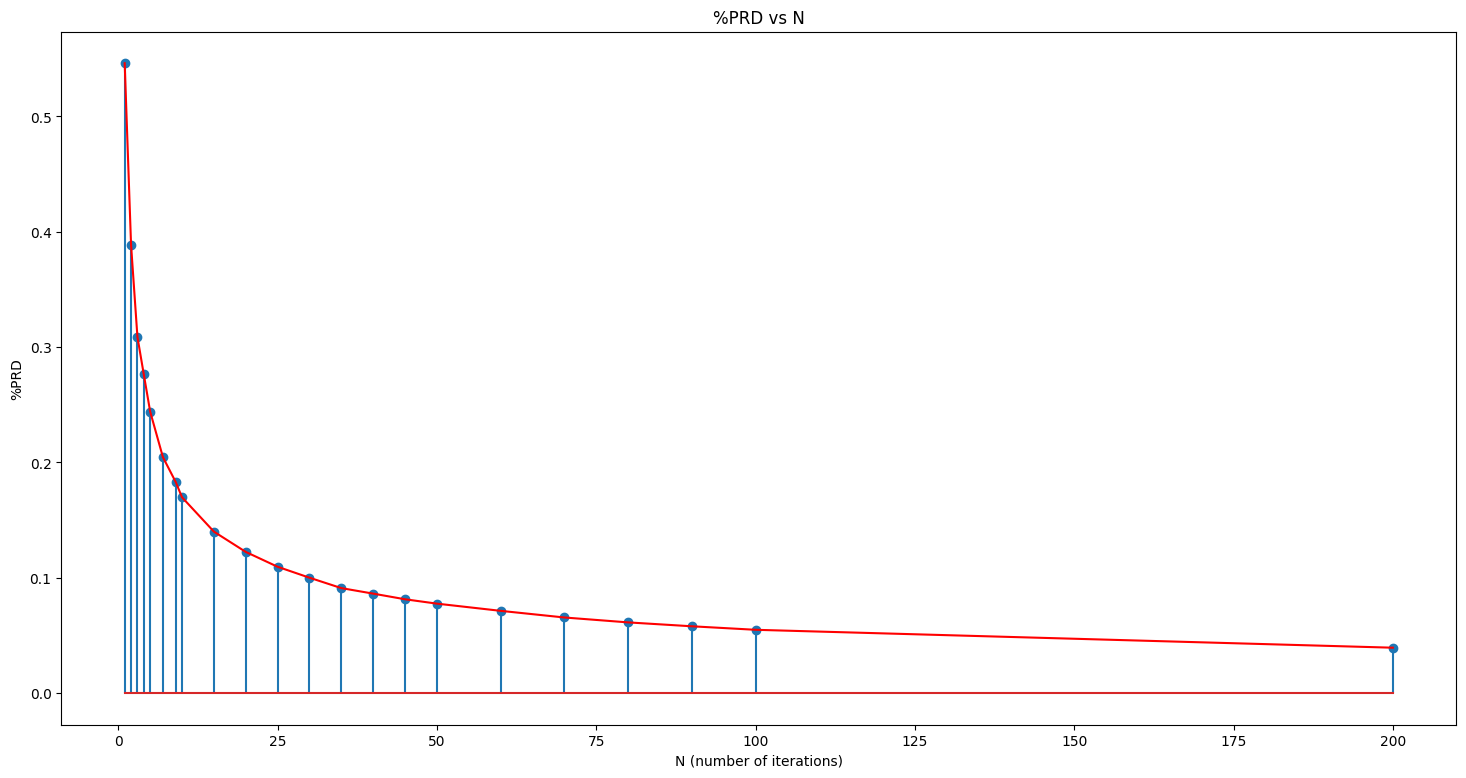

In [10]:
# Let us plot the PRD with respect to number of iterations
# iterations
N = np.array([1, 2, 3, 4 ,5,7,9, 10,15, 20,25, 30,35, 40,45, 50, 60, 70, 80, 90, 100,200])
print(len(N))
fig = plt.figure(figsize = (18, 9))
PRD = np.zeros((len(N), ))
print(PRD.shape)
for i in range(len(N)):
    PRD[i] = TimeSynchronizedAveraging(inputECG, N[i])
plt.stem(N, PRD)
plt.plot(N, PRD, color = 'r')
plt.title("%PRD vs N")
plt.xlabel("N (number of iterations)")
plt.ylabel("%PRD")

# **Question 3**

In [12]:
mat3 = scipy.io.loadmat("C:\\Users\\sahua\\Downloads\\BioMed\\Assignment1\\givenECG3.mat")

# Baseline Wander

In [13]:
#Creating baseline_wander
f = 0.5
fs = 360
ecg3 = mat3['givenECG3'].reshape((-1))
Amp = (max(ecg3) - min(ecg3))*0.5
time = np.arange(ecg3.size)/fs

baseline_wander = []
for i in range(len(time)):
  p = Amp * math.sin(2*np.pi*f*time[i])
  baseline_wander.append(p)

print(baseline_wander, len(baseline_wander))

[0.0, 1.4006089474890164, 2.801111233184004, 4.20140020341364, 5.601369220751406, 7.000911672136428, 8.399920976992485, 9.798290595344529, 11.19591403593211, 12.592684864319114, 13.988496710999136, 15.383243279495948, 16.77681835445838, 18.169115809749027, 19.56002961652617, 20.949453851318278, 22.3372827040905, 23.7234104863025, 25.107731638957056, 26.490140740638765, 27.87053251554232, 29.24880184148967, 30.62484375793544, 31.998553473960143, 33.36982637625037, 34.73855803706551, 36.10464422219033, 37.46798089887282, 38.82846424374667, 40.18599065073785, 41.54045673895458, 42.89175936056022, 44.23979560862836, 45.584462824979575, 46.925658607999246, 48.26328082043584, 49.59722759717906, 50.92739735301729, 52.25368879037365, 53.57600090702024, 54.89423300376983, 56.208284692144524, 57.51805590202069, 58.823446889249716, 60.12435824325388, 61.42069089459691, 62.71234612252843, 63.99922556250201, 65.28123121366592, 66.55826544632636, 67.83023100938226, 69.09703103773136, 70.358569059646

In [14]:
#Adding baseline_wander to ecg signal
signal_bw = np.array(ecg3) + np.array(baseline_wander)

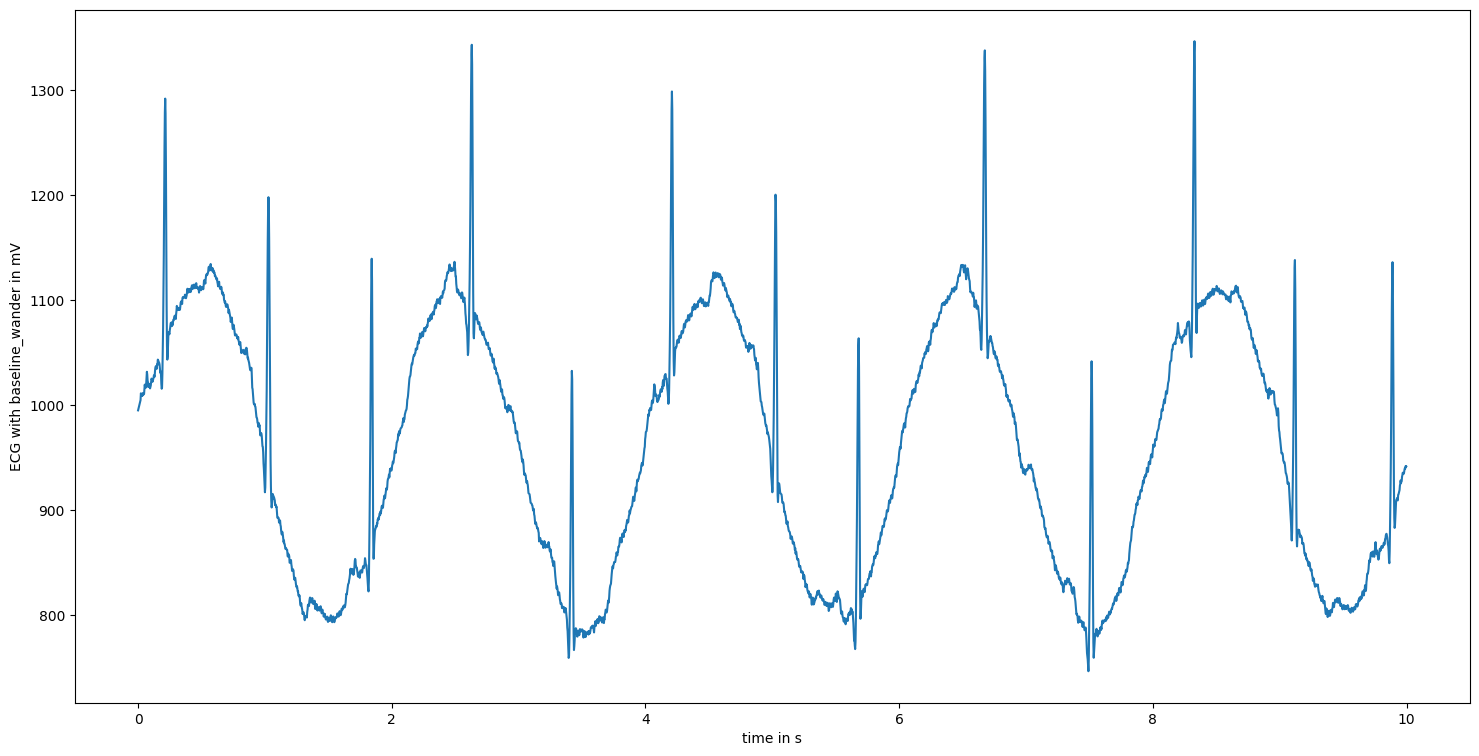

[995.         996.40060895 997.80111123 ... 941.7985998  941.19888877
 941.59939105]


In [15]:
#Plot ECG signal with baseline wander
fs = 360
time = np.arange(signal_bw.size) / fs
fig = plt.figure(figsize = (18, 9))
plt.plot(time, signal_bw)
plt.xlabel("time in s")
plt.ylabel("ECG with baseline_wander in mV")
plt.show()
print(signal_bw)

In [16]:
#High pass filter for removing baseline_wander noise from ecg signal


def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# rawdata = np.loadtxt('sampleSignal.txt', skiprows=0)
signal = signal_bw
fs = 360

cutoff = 1
order = 5
conditioned_signal = butter_highpass_filter(signal_bw, cutoff, fs, order)
print(conditioned_signal)

[-12.08376831 -11.3390825  -10.5991826  ...  -6.18225115  -7.53033121
  -7.86299722]


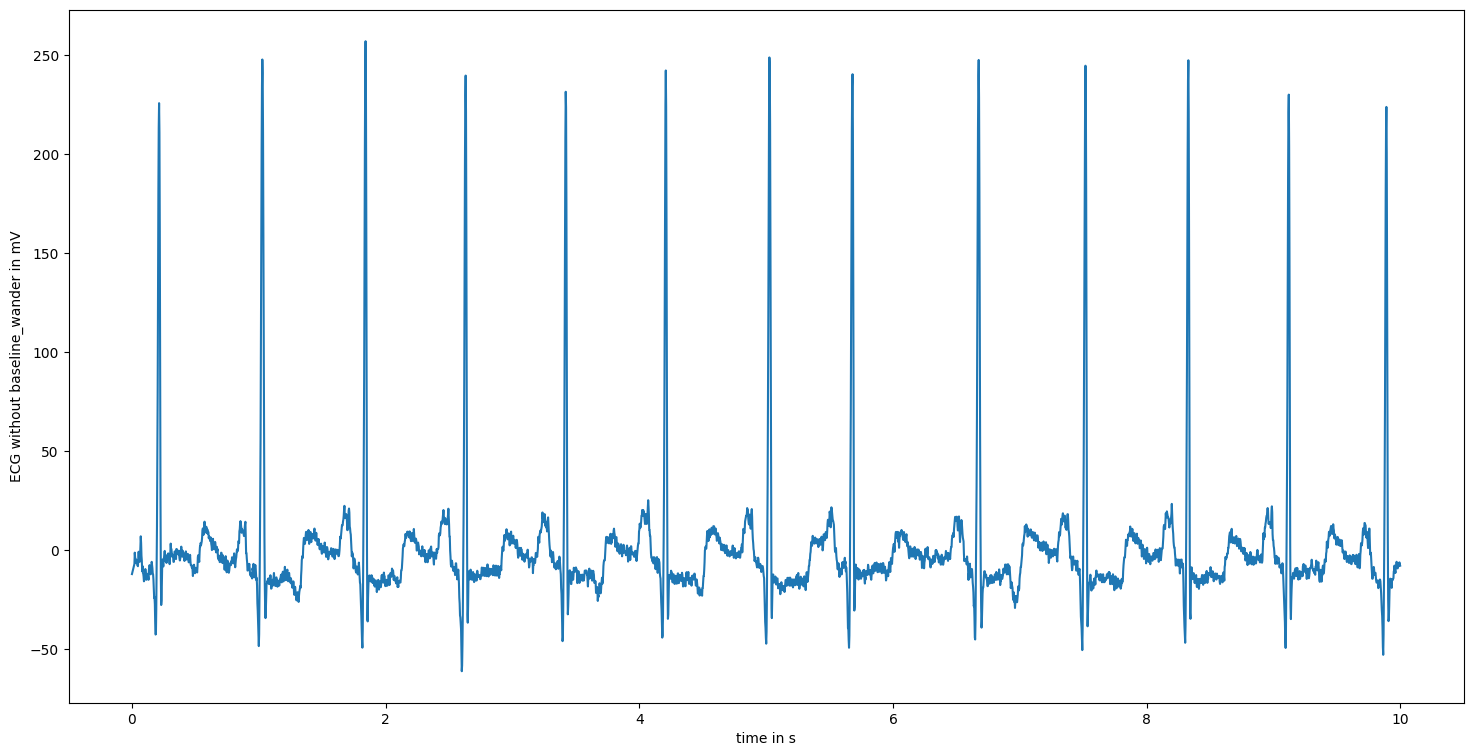

[-12.08376831 -11.3390825  -10.5991826  ...  -6.18225115  -7.53033121
  -7.86299722]


In [17]:
#Plot of ECG signal without baseline wander
fs = 360
time = np.arange(conditioned_signal.size) / fs
fig = plt.figure(figsize = (18, 9))
plt.plot(time, conditioned_signal)
plt.xlabel("time in s")
plt.ylabel("ECG without baseline_wander in mV")
plt.show()
print(conditioned_signal)

In [18]:
#Finding dc value of the ecg signal and adding it to the conditioned signal obtained from high pass filter
dc_value = np.mean(ecg3)
print(dc_value)
reconstructed_signal = conditioned_signal + dc_value
reconstructed_signal

960.0155555555556


array([947.93178725, 948.67647305, 949.41637295, ..., 953.83330441,
       952.48522435, 952.15255833])

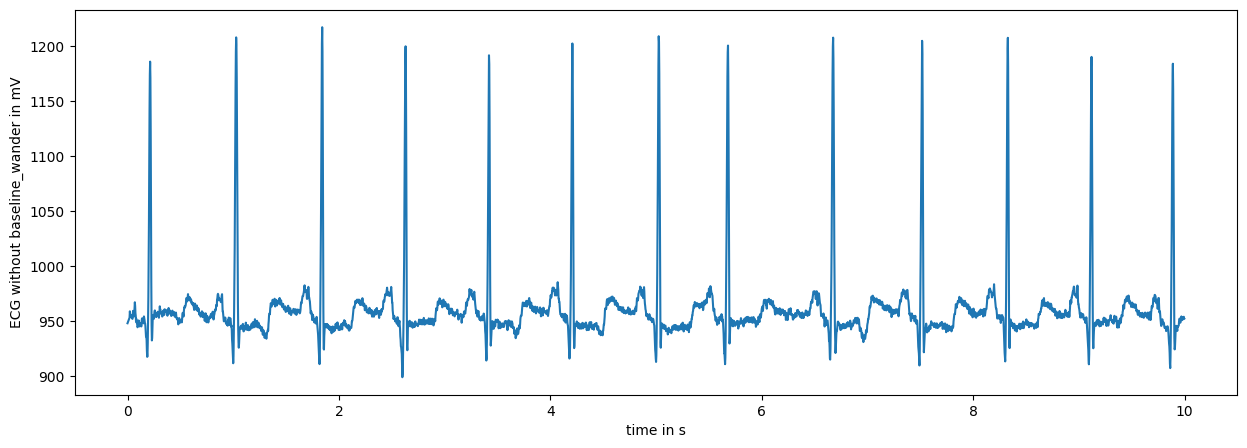

In [19]:
#Plot of reconstructed signal
fs = 360
time = np.arange(reconstructed_signal.size) / fs
fig = plt.figure(figsize = (15, 5))
plt.plot(time, reconstructed_signal)
plt.xlabel("time in s")
plt.ylabel("ECG without baseline_wander in mV")
plt.show()

In [20]:
#Find PRD
s=0.0
r=0.0
for i in range(len(reconstructed_signal)):
  s = s + (ecg3[i] - reconstructed_signal[i]) **2
  r = r + (ecg3[i])**2
prd_BW = np.sqrt(s/r)*100
print(prd_BW)

0.620125572190446


# Powerline Interference

In [21]:
#Creating Powerline interference
f = 50
fs = 360
ecg3 = mat3['givenECG3'].reshape((-1))
Amp = (max(ecg3) - min(ecg3))*0.5
time = np.arange(ecg3.size)/fs

powerline_interference = []
for i in range(len(time)):
    w = Amp * math.sin(2*np.pi*f*time[i])
    powerline_interference.append(w)

print(powerline_interference, len(powerline_interference))

[0.0, 122.95013312059599, 158.06164435845938, 80.24999999999999, -54.894233003769884, -150.8206656361383, -138.9970773074024, -27.870532515542326, 103.16741135468966, 160.5, 103.16741135468952, -27.87053251554223, -138.9970773074024, -150.82066563613833, -54.89423300376985, 80.24999999999984, 158.06164435845943, 122.95013312059594, -1.868273670921651e-13, -122.95013312059581, -158.06164435845938, -80.25000000000001, 54.894233003769656, 150.8206656361382, 138.99707730740238, 27.870532515542426, -103.16741135468935, -160.5, -103.16741135468959, 27.870532515542696, 138.9970773074022, 150.82066563613827, 54.8942330037694, -80.24999999999976, -158.06164435845943, -122.95013312059599, 3.736547341843302e-13, 122.95013312059612, 158.0616443584595, 80.25000000000011, -54.894233003770104, -150.82066563613813, -138.99707730740244, -27.870532515541957, 103.16741135468928, 160.5, 103.16741135469009, -27.87053251554316, -138.99707730740246, -150.8206656361385, -54.894233003770026, 80.25000000000018,

In [22]:
#Adding powerline interference to ecg signal
signal_pi = np.array(ecg3) + np.array(powerline_interference)

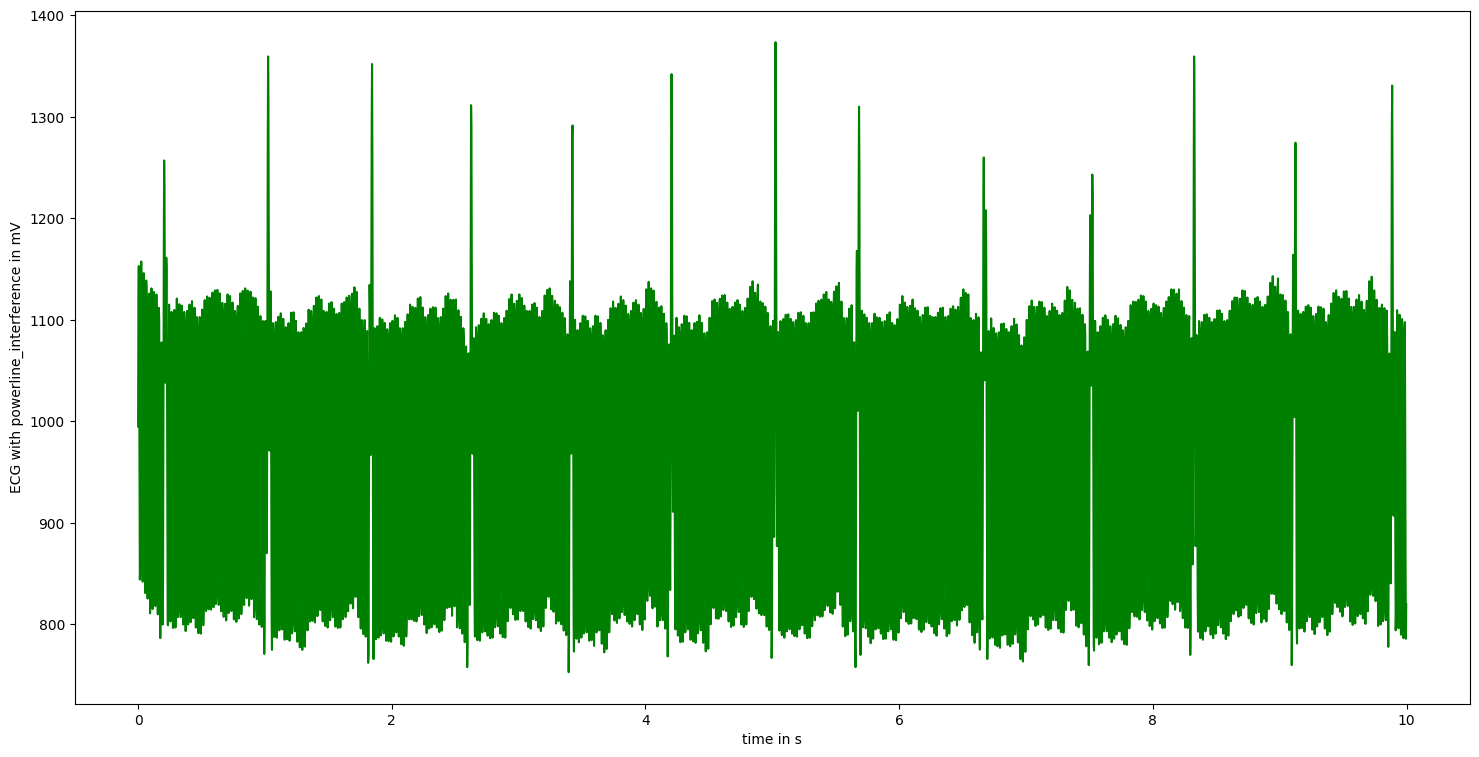

[ 995.         1117.95013312 1153.06164436 ...  865.75        785.93835564
  820.04986688]


In [23]:
#Plot of ECG signal with powerline_interference
fs = 360
time = np.arange(signal_pi.size) / fs
fig = plt.figure(figsize = (18, 9))
plt.plot(time, signal_pi , color='g')
plt.xlabel("time in s")
plt.ylabel("ECG with powerline_interference in mV")
plt.show()
print(signal_pi)

In [24]:
#Notch filter for removing of powerline interference from ecg signal

def notch_filter(cutoff, q):
    nyq = 0.5*fs
    freq = cutoff/nyq
    b, a = iirnotch(freq, q)
    return b, a


def notch(data, powerline, q):
    b,a = notch_filter(powerline,q)
    z = lfilter(b,a,data)
    return z

signal = signal_pi
fs = 360

powerline = 50
order = 6
q=20

filtered_signal = notch(signal_pi,powerline,q)


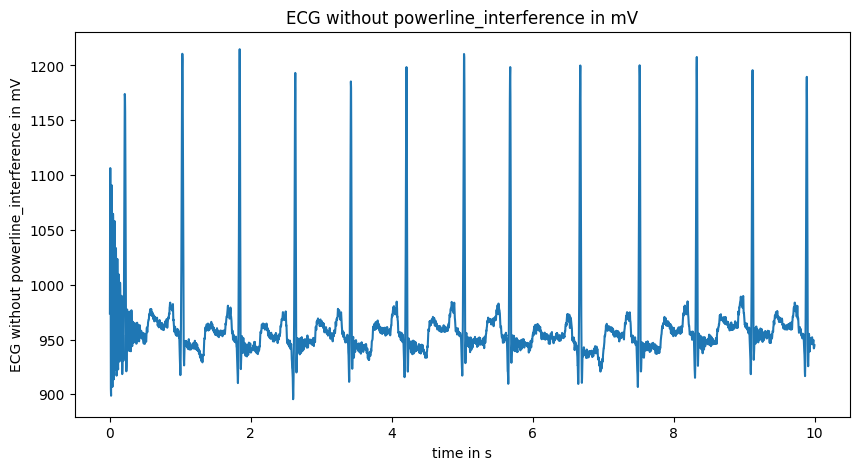

[ 973.75264177 1067.34549437 1106.35944234 ...  942.85095821  943.0135821
  944.83757916]


In [25]:
#Plot of ECG signal without powerline interference
fs = 360
time = np.arange(filtered_signal.size) / fs
fig = plt.figure(figsize = (10, 5))
plt.plot(time, filtered_signal)
plt.title("ECG without powerline_interference in mV")
plt.xlabel("time in s")
plt.ylabel("ECG without powerline_interference in mV")
plt.show()
print(filtered_signal)

In [26]:
#Find PRD
deno = 0.0
numo = 0.0
for i in range(len(filtered_signal)):
  numo = numo + (ecg3[i] - filtered_signal[i])**2
  deno = deno + ecg3[i]**2
prd_PL = np.sqrt(numo/r)*100
print(prd_PL)

0.7109734270173572
